In [8]:
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import WordPunctTokenizer

from wordcloud import WordCloud

In [21]:
#df = pd.read_csv('eng_pop.csv')
df = pd.read_csv('eng_rock.csv')
print(len(df))
df.head()

3846


,Title,Likes,Singer,Lyrics
0,Sugar,"231,263",Maroon 5,I'm hurting baby\nI'm broken down\nI need your...
1,Believer,"225,690",Imagine Dragons,First things first\nI'ma say all the words\nin...
2,High Hopes,"86,198",Panic! At The Disco,Had to have high\nhigh hopes for a living\nSho...
3,Lost Stars,"273,747",Adam Levine,Please don't see just a boy\ncaught up in drea...
4,Payphone (Feat. Wiz Khalifa),"60,084",Maroon 5,I'm at a payphone\ntrying to call home\nAll of...


In [22]:
lyrics = df.Lyrics.to_list()
print(len(lyrics))
print(lyrics[0])

#file_name = 'eng_pop_text.txt'
file_name = 'eng_rock_text.txt'
with open(file_name, 'w', encoding = 'utf-8') as file:
    file.write('\n'.join(lyrics))

3846
I'm hurting baby
I'm broken down
I need your loving loving
I need it now
When I'm without you
I'm something weak
You got me begging begging
I'm on my knees
I don't wanna be needing your love
I just wanna be deep in your love
And it's killing me
when you're away
Ooh baby cause a bullet don't
care where you are
I just wanna be there
where you are
And I gotta get one little taste
Sugar
Yes please
Won't you come
and put it down on me
Oh right here cause I need
Little love and little sympathy
Yeah you show me
good loving
Make it alright
Need a little a sweetness
in my life
Sugar
Yes please
Won't you come and
put it down on me
My broken pieces
You put them up
Don't leave me hanging hanging
Come get me some
When I'm without ya
I'm so insecure
You are the one thing one thing
I'm living for
I don't wanna be needing your love
I just wanna be deep in your love
And it's killing me
when you're away
Ooh baby cause a bullet don't
care where you are
I just wanna be there
where you are
And I gotta

In [23]:
with open('eng_rock_text.txt', 'r', encoding = 'utf-8') as file:
    lyrics = file.read()
print(lyrics[:50])

I'm hurting baby
I'm broken down
I need your lovin


In [14]:
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\god12\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\god12\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


Emma
refuse
permit


In [24]:
find_pos = ['NN', 'NNS', 'NNP', 'NNPS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'JJ', 'JJR', 'JJS']
def normalize(lyric):
    nouns = []
    for word in nltk.tag.pos_tag(nltk.tokenize.word_tokenize(lyric)):
        if word[1] in find_pos:
            nouns.append(word[0])
    lyric_noun = [noun for noun in nouns if len(noun) > 1]
    return lyric_noun

In [25]:
normalized_text = normalize(lyrics)
normalized_text[:5]

["'m", 'hurting', 'baby', "'m", 'broken']

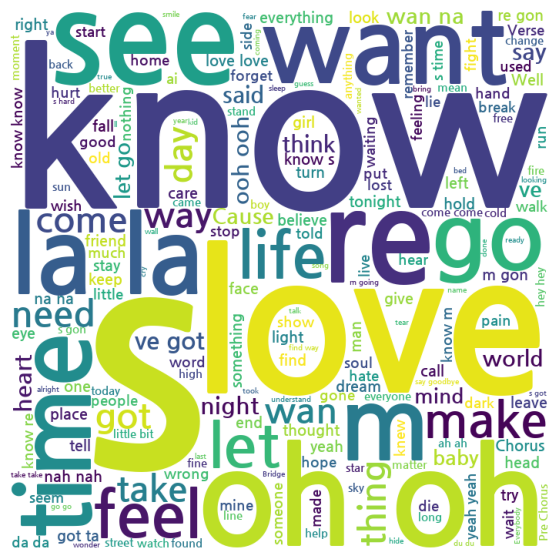

In [26]:
text = ' '.join(normalized_text)
wc = WordCloud(font_path = 'NanumGothicBold.ttf', width = 700, height = 700, background_color = 'white').generate(text)
#wc.to_file('wc/eng_pop_wc.png')
wc.to_file('wc/eng_rock_wc.png')
plt.figure(figsize = (7, 7))
plt.axis('off')
plt.imshow(wc)
plt.show()